# <span style="color:#35BCE9">Sandbox</span>
Main Objective: <em>Simple, working, command-line based iteration of GAN Image Generator</em>
<br/><br/>
<u>Inputs</u><br/>
Train images, both true and imposter
<br/><br/>
<u>Outputs</u><br/>
Generated image mimicking true

## <span style="color:#35BCE9">Phase I: Load Train Images</span>

#### Imports

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

In [2]:
import cv2
import glob

In [3]:
# Image Directory
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
image_dir = os.path.join(parent_dir, 'Images')
os.listdir(image_dir)

['TestImages', '.DS_Store', 'ResultImages', 'TrainingImages']

#### PyTorch Data Handling

In [4]:
class ImageDataset(Dataset):
    def __init__(self, imagePaths):
        # data loading
        self.imagePaths = imagePaths
        self.TARGET_HEIGHT = 256
        self.TARGET_WIDTH = 256

    def __len__(self):
        # len()
        return len(self.imagePaths)

    def __getitem__(self, idx):
        # indexing
        image = cv2.imread(self.imagePaths[idx])
        imageRgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resizedImage = self.resizeImage(imageRgb)
        float32Image = torch.tensor(resizedImage, dtype=torch.float32)
        imageTensor = float32Image.permute(2, 0, 1) / 255.0 # Normalize
        #finalTensor = imageTensor.unsqueeze(0)
        return imageTensor # [1, 3, 256, 256]
    
    def resizeImage(self, image):
        # resize to target width and height
        image = cv2.resize(image, (self.TARGET_WIDTH, self.TARGET_HEIGHT))
        height, width = image.shape[:2]
        
        # Pad image if below the target size
        top = bottom = (self.TARGET_HEIGHT - height) // 2
        left = right = (self.TARGET_WIDTH - width) // 2

        # Apply padding 
        paddedImage = cv2.copyMakeBorder(
            image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0)
        )

        return paddedImage

    def showImage(self, idx):
        imageTensor = self[idx]
        np_image = imageTensor.detach().cpu().numpy()
        if np_image.ndim == 3 and np_image.shape[0] == 3: # Check if it's a 3-channel image
            np_image = np.transpose(np_image, (1, 2, 0))

        plt.imshow(np_image)
        plt.axis('off') # Turn off axis labels and ticks
        plt.show()

In [5]:
imageFolder = f"{image_dir}/TrainingImages/Goth"
imagePaths = glob.glob(f"{imageFolder}/*.jpg") + glob.glob(f"{imageFolder}/*.png")

dataset = ImageDataset(imagePaths=imagePaths)

In [6]:
imageFolder

'/Users/andrewturangan/Local/GanAnime/Images/TrainingImages/Goth'

In [7]:
dataset[0]

tensor([[[0.8706, 0.8784, 0.8784,  ..., 0.8667, 0.8627, 0.8863],
         [0.8667, 0.8784, 0.8667,  ..., 0.6863, 0.8745, 0.8824],
         [0.8824, 0.8706, 0.8196,  ..., 0.6078, 0.8745, 0.8824],
         ...,
         [0.9216, 0.9098, 0.9098,  ..., 0.8314, 0.8314, 0.9255],
         [0.9059, 0.8902, 0.9176,  ..., 0.9176, 0.9176, 0.9255],
         [0.9098, 0.9137, 0.9216,  ..., 0.9098, 0.9059, 0.8980]],

        [[0.8510, 0.8588, 0.8549,  ..., 0.8471, 0.8431, 0.8667],
         [0.8588, 0.8627, 0.8588,  ..., 0.6431, 0.8510, 0.8588],
         [0.8627, 0.8549, 0.7882,  ..., 0.5373, 0.8510, 0.8667],
         ...,
         [0.9059, 0.8863, 0.8941,  ..., 0.7529, 0.7804, 0.9020],
         [0.8980, 0.8667, 0.8941,  ..., 0.8902, 0.8863, 0.8980],
         [0.8863, 0.8941, 0.8980,  ..., 0.8863, 0.8784, 0.8706]],

        [[0.8667, 0.8706, 0.8706,  ..., 0.8588, 0.8471, 0.8784],
         [0.8627, 0.8667, 0.8706,  ..., 0.6235, 0.8667, 0.8745],
         [0.8706, 0.8588, 0.7647,  ..., 0.4745, 0.8588, 0.

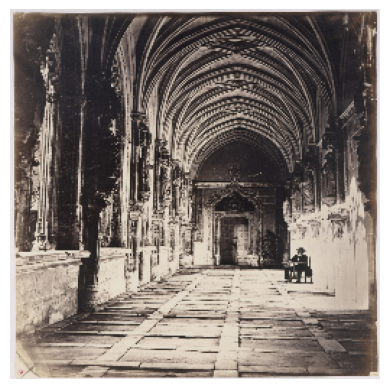

In [8]:
dataset.showImage(0)

#### Train \& Test Image Dataset

In [9]:
trainFolder = f"{image_dir}/TrainingImages/Goth"
imagePaths = glob.glob(f"{trainFolder}/*.jpg") + glob.glob(f"{trainFolder}/*.png")
trainDataset = ImageDataset(imagePaths=imagePaths)

testFolder = f"{image_dir}/TestImages/Goth"
imagePaths = glob.glob(f"{testFolder}/*.jpg") + glob.glob(f"{testFolder}/*.png")
testDataset = ImageDataset(imagePaths=imagePaths)

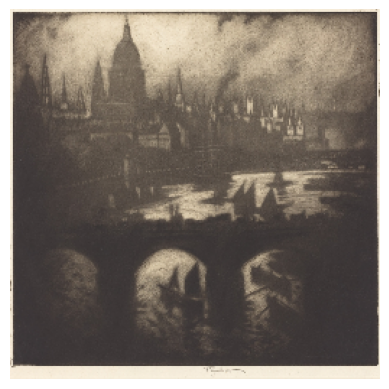

In [10]:
testDataset.showImage(0)

#### DataLoader

In [11]:
trainLoader = DataLoader(dataset=trainDataset, batch_size=1, shuffle=True)
testLoader = DataLoader(dataset=testDataset, batch_size=1, shuffle=True)

## <span style="color:#35BCE9">Phase II: Build GAN</span>

## <span style="color:#35BCE9">Phase III: Train GAN</span>

## <span style="color:#35BCE9">Phase IV: Generate Images</span>